# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv('../data/states_edu.csv')

In [37]:
print(df.columns)
df.head()

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE',
       'EXPENDITURE_PER_POINT_INCREASE'],
      dtype='object')


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,EXPENDITURE_PER_POINT_INCREASE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,5879.773810
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,5418.520755
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,3766.886719
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,55015.026820
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN,6038.477941


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [3]:
# remove data where 8th grade math score doesn't exist
df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *Grade 8 Math*

How many years of data are logged in our dataset? 

In [4]:
df["YEAR"].nunique()

13

In [5]:
print("Michigan: " + str(df[df['STATE'] == "MICHIGAN"]["AVG_MATH_8_SCORE"].mean()))
print("Ohio: " + str(df[df['STATE'] == "OHIO"]["AVG_MATH_8_SCORE"].mean()))

Michigan: 276.1666666666667
Ohio: 282.25


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

Find the average for your chosen test across all states in 2019

In [7]:
df[df['YEAR'] == 2019]["AVG_MATH_8_SCORE"].mean()

281.2641509433962

For each state, find a maximum value for your chosen test score

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [30]:
df.groupby("STATE")["AVG_MATH_8_SCORE"].max().sort_values(ascending=False)

STATE
MASSACHUSETTS           301.0
NEW_JERSEY              296.0
NEW_HAMPSHIRE           296.0
VERMONT                 295.0
MINNESOTA               295.0
NORTH_DAKOTA            293.0
DODEA                   293.0
MONTANA                 293.0
COLORADO                292.0
SOUTH_DAKOTA            291.0
TEXAS                   290.0
WASHINGTON              290.0
VIRGINIA                290.0
KANSAS                  290.0
PENNSYLVANIA            290.0
OHIO                    290.0
WYOMING                 289.0
CONNECTICUT             289.0
WISCONSIN               289.0
MAINE                   289.0
MARYLAND                288.0
NEBRASKA                288.0
INDIANA                 288.0
UTAH                    287.0
IDAHO                   287.0
NORTH_CAROLINA          286.0
MISSOURI                286.0
IOWA                    286.0
NATIONAL                285.0
ILLINOIS                285.0
OREGON                  285.0
DELAWARE                284.0
RHODE_ISLAND            284.0
ALAS

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [6]:
df['EXPENDITURE_PER_POINT_INCREASE'] = df['INSTRUCTION_EXPENDITURE'] / df['AVG_MATH_8_SCORE']

**Feature engineering justification**: States like Massachusetts historically have good education programs, which is reflected in their high test scores here. I want to find out if this is due to more spending on education per capita or not.

Additionally, I hypothesize that there is a "baseline" score that all students can achieve without extra educational spending. Thus, states who do spend a lot on education could see very large numbers for the above variable, compared to states who spend very little.

In [7]:
df.groupby('STATE')["EXPENDITURE_PER_POINT_INCREASE"].mean().sort_values(ascending=False)

STATE
CALIFORNIA              113662.501617
NEW_YORK                107823.723163
TEXAS                    71050.062368
ILLINOIS                 45700.234979
FLORIDA                  43729.203926
NEW_JERSEY               43100.708462
PENNSYLVANIA             42914.744444
OHIO                     33521.426724
MICHIGAN                 30681.296917
GEORGIA                  29493.180740
MASSACHUSETTS            25173.619776
VIRGINIA                 23770.988186
NORTH_CAROLINA           22702.654114
MARYLAND                 20268.859125
WASHINGTON               19193.579858
WISCONSIN                18189.286840
INDIANA                  17468.627981
MINNESOTA                16710.353807
MISSOURI                 15680.306911
CONNECTICUT              15594.908734
TENNESSEE                15292.501474
COLORADO                 12752.139202
LOUISIANA                12629.978648
ARIZONA                  12107.543524
ALABAMA                  12052.138407
SOUTH_CAROLINA           11653.665539
KENTUC

We can see that states that performed well such as Massachusetts and New Jersey spent a larger amount of money per point increase. Interestingly, states like Vermont and New Hampshire performed extremely well both in scores and expenditures per point increase. I hypothesize that this is because of their small population, in comparison to large states like New York and California which performed mediocrely in terms of scores yet spent the most per point increase.

<h2>EDA</h2>

I'm taking a closer look at the data (per the tutorial) to try to understand it more.

<Axes: title={'center': 'Distribution of 8th Grade Math Scores'}, ylabel='Frequency'>

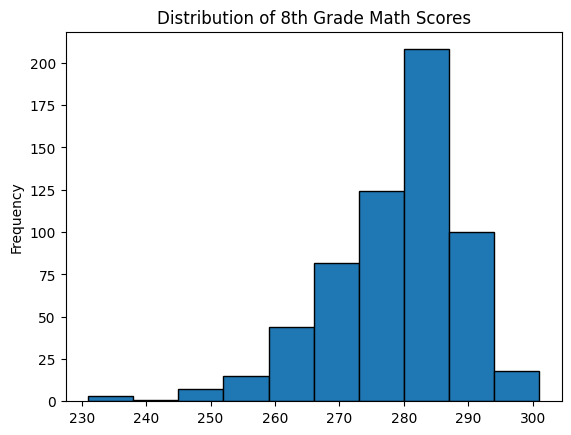

In [8]:
df.AVG_MATH_8_SCORE.plot.hist(title="Distribution of 8th Grade Math Scores", edgecolor="black")

Text(0.5, 1.0, '8th Grade Math Score Over Time')

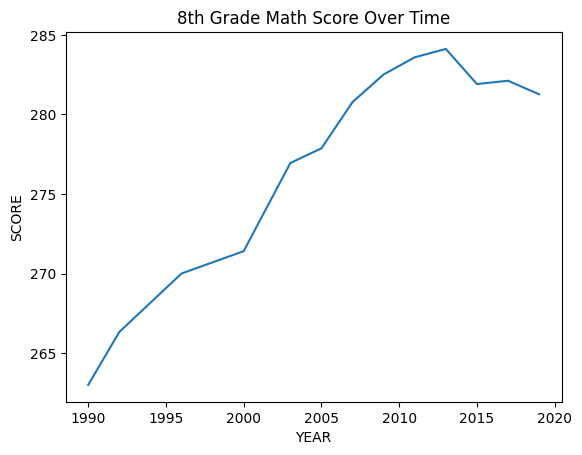

In [10]:
df.groupby('YEAR')["AVG_MATH_8_SCORE"].mean().plot()
plt.ylabel('SCORE')
plt.title('8th Grade Math Score Over Time')

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '8th Grade Math Score')

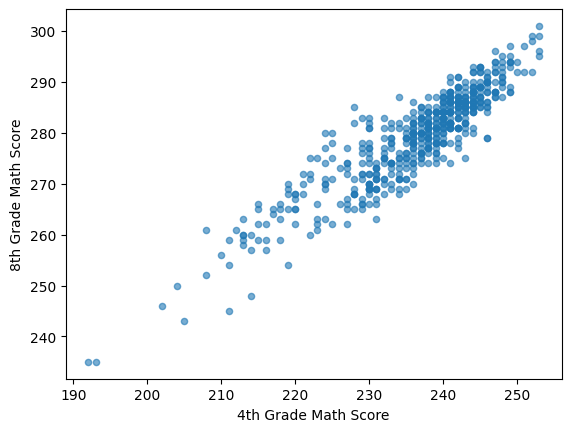

In [40]:
df.plot.scatter(x='AVG_MATH_4_SCORE', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('4th Grade Math Score')
plt.ylabel('8th Grade Math Score')

There is a large correlation between students' 4th grade and 8th grade math scores. This means that we can somewhat accurately predict their 8th grade math scores if we know their scores in 4th grade. Similarly, if we want to improve their 8th grade math scores, we can start as early as 4th grade to have a meaningful impact on their scores.

**Visualization 2**

Text(0, 0.5, '8th Grade Math Score')

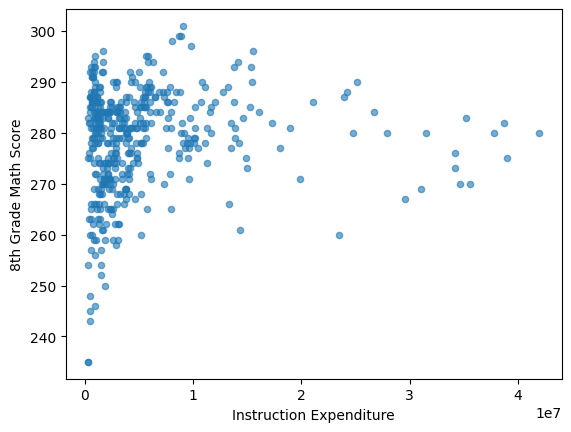

In [12]:
df.plot.scatter(x='INSTRUCTION_EXPENDITURE', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('Instruction Expenditure')
plt.ylabel('8th Grade Math Score')

We can see that the correlation between states' instruction expenditure and the scores students received on their 8th grade math exams did not matter much. Thus, the prominent belief that more funding leads to higher test scores is not necessarily true; there could be many other factors influencing scores.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [14]:
from sklearn.model_selection import train_test_split

In [22]:
X = df[['GRADES_8_G','AVG_READING_8_SCORE','AVG_READING_4_SCORE']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']
y.fillna(y.median(), inplace=True)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [24]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [25]:
# create your model here
model = LinearRegression()

In [26]:
model.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

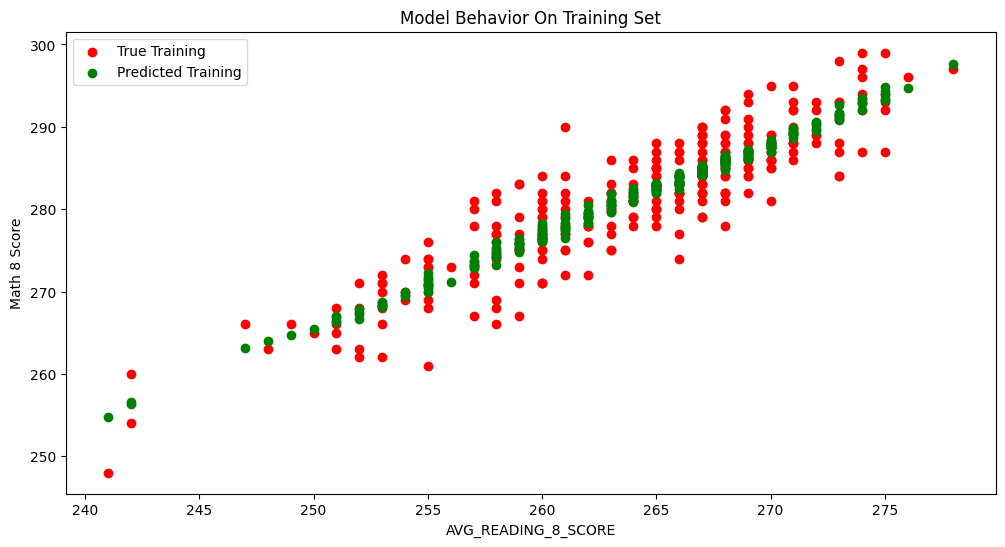

In [30]:
col_name = 'AVG_READING_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Math 8 Score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

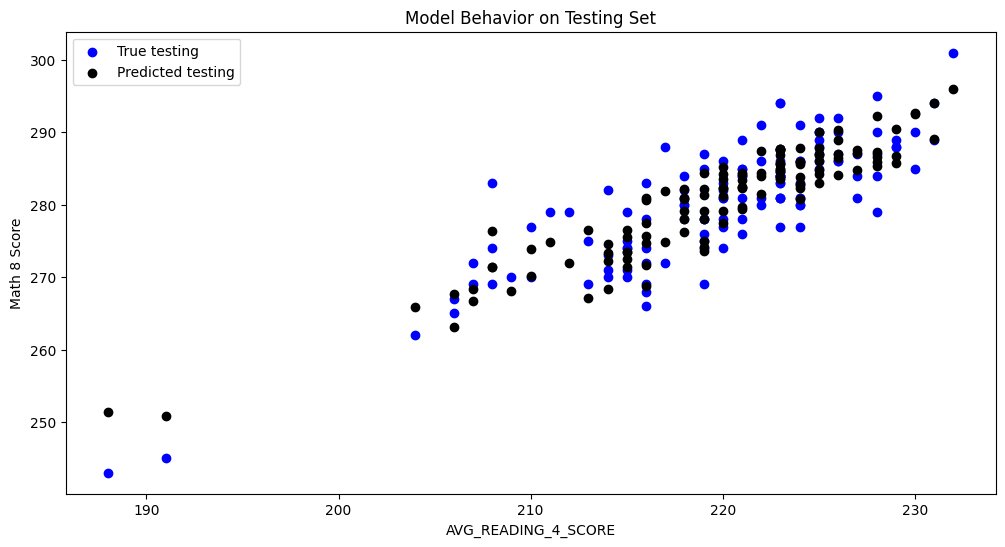

In [32]:
col_name = 'AVG_READING_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 8 Score')
plt.title("Model Behavior on Testing Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

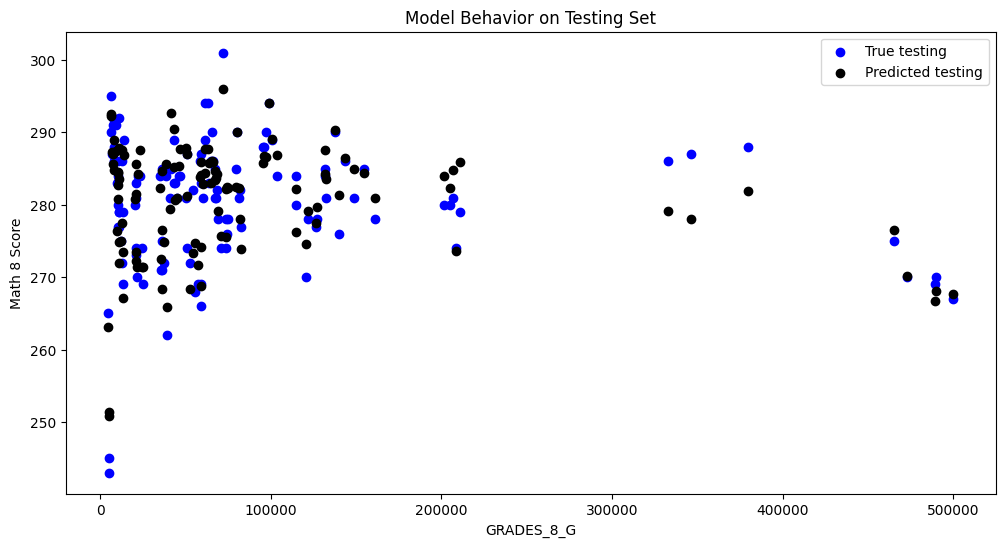

In [33]:
col_name = 'GRADES_8_G'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 8 Score')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

Through this exploratory project, I analyzed a data set containing information on students' 4th and 8th grade math and reading test scores in comparison to other variables, including their state, their state's expenditure in different categories, and more. From the tests that I ran, there was no significant expenditure state expenditure and education level, which I hypothesize to be a result of multiple categories. The main hypothesis I had was that there is a "bottom threshold" for student test scores, meaning that if all states ceased to spend money on students or spent a fixed amount per student, that test score obtained would be the "bottom threshold." From there, states that spent more on funding would receive diminishing returns on a funding vs. test score increase. The that I created was fairly accurate. However, I observed that for the strongly correlated variables (8th grade reading and 4th grade math scores), the model was too tight and didn't contain the same range that the true values had.